In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Import Modules, Load Data and Data Review

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

Read the data

In [3]:
#df = pd.read_csv("/content/drive/MyDrive/final_scout_not_dummy.csv")
df = pd.read_csv("final_scout_not_dummy.csv")

In [4]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


Exploring the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [6]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000
mean,18024.381,32089.996,5.937,1.390,1.043,88.499,0.247,1428.662,1337.701,4.832
std,7381.679,36977.215,0.705,1.121,0.339,26.674,0.431,275.804,199.682,0.868
min,4950.000,0.000,5.000,0.000,0.000,40.000,0.000,890.000,840.000,3.000
25%,12850.000,1920.500,5.000,0.000,1.000,66.000,0.000,1229.000,1165.000,4.100
50%,16900.000,20413.000,6.000,1.000,1.000,85.000,0.000,1461.000,1295.000,4.800
75%,21900.000,46900.000,6.000,2.000,1.000,103.000,0.000,1598.000,1472.000,5.400
max,74600.000,317000.000,8.000,3.000,4.000,294.000,1.000,2967.000,2471.000,9.100


In [7]:
df.duplicated().sum()

1673

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.make_model.value_counts()

Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: make_model, dtype: int64

Feature Engineering

In [11]:
# select_dtypes(include ="object") to filter only object type features
df_object = df.select_dtypes(include ="object").head()
df_object


,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


In [12]:
# we see how many unique observations each feature consists of.

for col in df_object:
    print(f"{col:<30}:", df[col].nunique())



make_model                    : 9
body_type                     : 8
vat                           : 2
Type                          : 5
Fuel                          : 4
Comfort_Convenience           : 6196
Entertainment_Media           : 346
Extras                        : 659
Safety_Security               : 4442
Paint_Type                    : 3
Upholstery_type               : 2
Gearing_Type                  : 3
Drive_chain                   : 3


Converting the Extras feature from object to numeric

In [13]:
df.Extras.sample(3)

2018     Alloy wheels,Voice Control
13075                  Alloy wheels
11541     Alloy wheels,Touch screen
Name: Extras, dtype: object

In [14]:
df.Extras.apply(lambda x: len(x.split(',')))

0        3
1        4
2        2
3        3
4        4
        ..
15907    3
15908    2
15909    5
15911    3
15912    1
Name: Extras, Length: 14242, dtype: int64

In [15]:
df["Extras"] = df.Extras.apply(lambda x: len(x.split(','))) #We assign these numbers we find to the relevant feat.

In [16]:
df.head(6) # check extras feature turned into numeric

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",3,"ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",4,"ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",2,"ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",3,"ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",4,"ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
5,Audi A1,Sedans,15090,VAT deductible,63668.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",4,"ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Part/Full Leather,Automatic,1598.000,1135.000,front,3.500


In [17]:
df.Extras.nunique() # 6478 unique value --> reduced to 10 unique.

10

In [18]:
df.Extras.unique()

array([ 3,  4,  2,  1,  6,  5,  7,  8, 10,  9])

In [19]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Audi A1' 'Audi A2' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Off-Road' 'Convertible'
 'Transporter']
vat                           : ['VAT deductible' 'Price negotiable']
Type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel                          : ['Diesel' 'Benzine' 'LPG/CNG' 'Electric']
Comfort_Convenience           : ['Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system'
 'Air conditioning,Automatic climate control,Hill Holder,Leather steering wheel,Lumbar support,Parking assist system sensors rear,Power windows,S

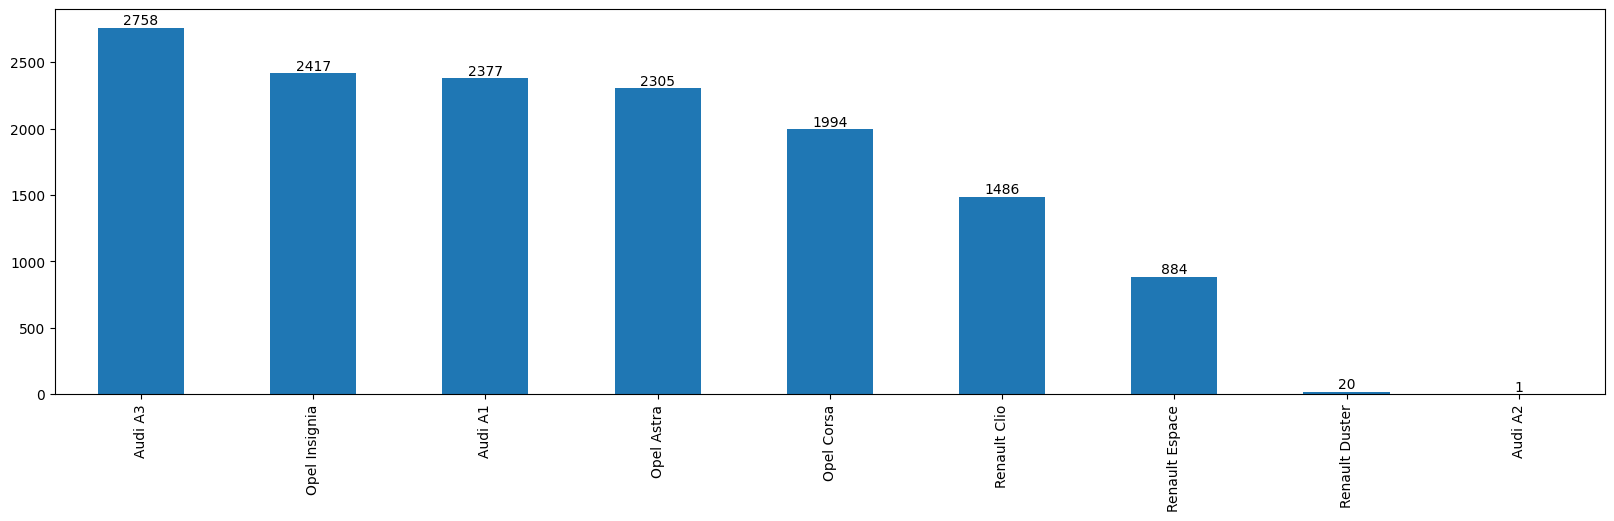

In [20]:
ax = df.make_model.value_counts().iloc[:35].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

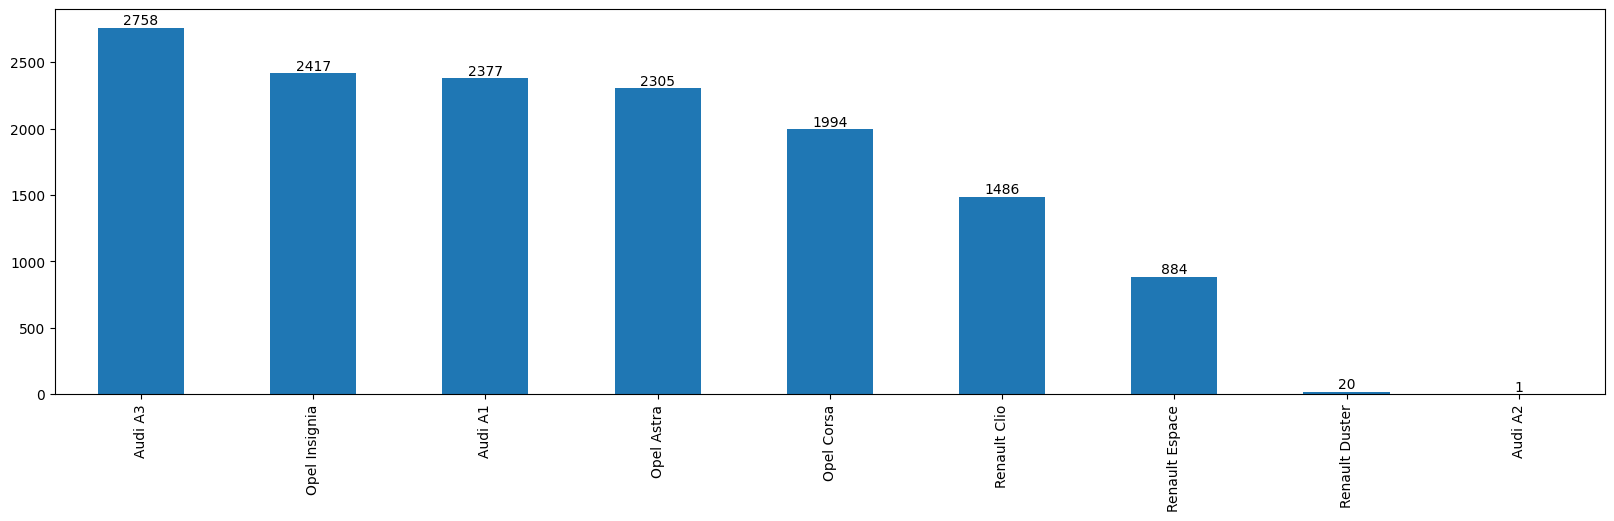

In [21]:
ax = df.make_model.value_counts().iloc[-35:].plot(kind ="bar", figsize=(20,5))

ax.bar_label(ax.containers[0]);

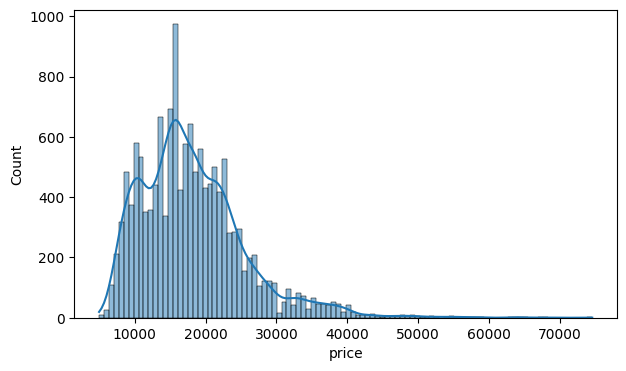

In [22]:
sns.histplot(df.price, bins=100, kde=True);

In [23]:
skew(df.price)

1.268341774062903

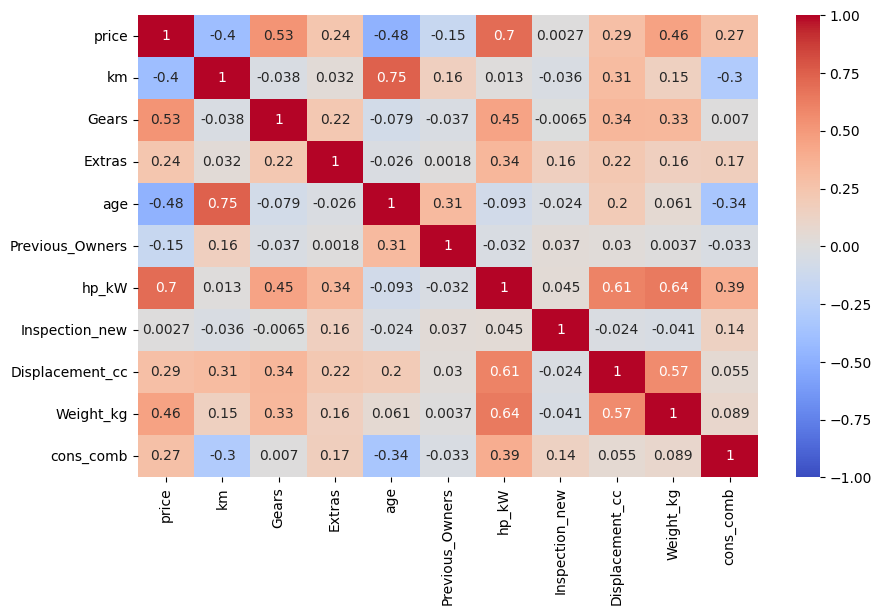

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");

multicollinearity control

In [25]:
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True))>= 0.9) & (abs(df.corr(numeric_only=True)) < 1)] .any().any()

False

Outliers in Price Column

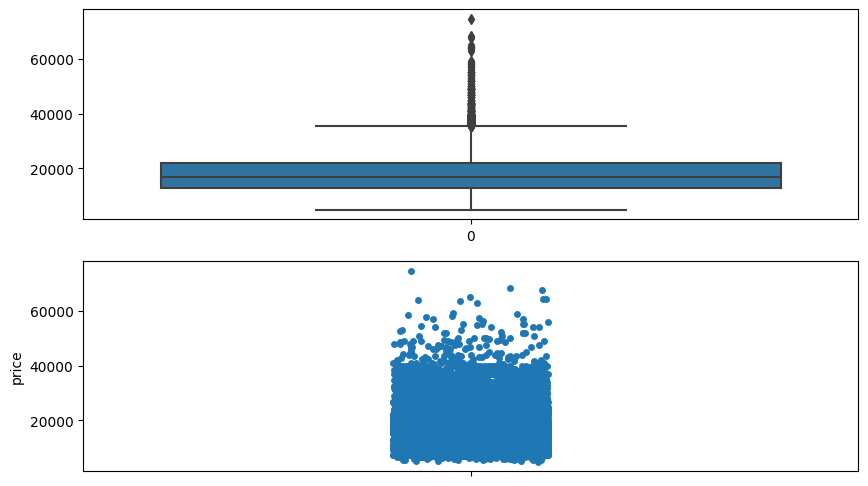

In [26]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.price)

plt.subplot(212)
sns.stripplot(df.price);

In [27]:
total_outliers = []

for model in df.make_model.unique():

    car_prices = df[df["make_model"]== model]["price"]

    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5*IQR
    upper_lim = Q3 + 1.5*IQR

    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()

    total_outliers.append(count_of_outliers)

    print(f" The count of outlier for {model:<24} : {count_of_outliers:<2},\
    The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))


 The count of outlier for Audi A1                  : 5 ,    The rate of outliers : 0.002
 The count of outlier for Audi A2                  : 0 ,    The rate of outliers : 0.0
 The count of outlier for Audi A3                  : 56,    The rate of outliers : 0.02
 The count of outlier for Opel Astra               : 127,    The rate of outliers : 0.055
 The count of outlier for Opel Corsa               : 0 ,    The rate of outliers : 0.0
 The count of outlier for Opel Insignia            : 109,    The rate of outliers : 0.045
 The count of outlier for Renault Clio             : 37,    The rate of outliers : 0.025
 The count of outlier for Renault Duster           : 0 ,    The rate of outliers : 0.0
 The count of outlier for Renault Espace           : 20,    The rate of outliers : 0.023

Total_outliers :  354 The rate of total outliers : 0.025


Data Pre-Processing

In [28]:
X= df.drop(columns="price")
y= df.price

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Converting Object Features into Numerical Features Using Make Column Transformer

In [30]:
df.select_dtypes(include="object").head()

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


In [31]:
cat_onehot = ['make_model', 'body_type', 'vat', 'Fuel','Comfort_Convenience' , 'Entertainment_Media','Safety_Security', 'Upholstery_type']
cat_ordinal = ['Type', 'Paint_Type', 'Gearing_Type', 'Drive_chain']

cat_for_type = ['Used', "Employee's car", 'New', 'Demonstration', 'Pre-registered']

cat_for_Paint_Type=['Metallic', 'Uni/basic', 'Perl effect']
cat_for_Gearing_Type=['Automatic', 'Manual' ,'Semi-automatic']
cat_for_Drive_chain=['front', '4WD', 'rear']


In [32]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        (OrdinalEncoder(categories= [cat_for_type,
                                                    cat_for_Paint_Type,
                                                    cat_for_Gearing_Type,
                                                    cat_for_Drive_chain]),cat_ordinal),
                         remainder='passthrough',
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

In [33]:
X_train.head()

,make_model,body_type,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
6175,Opel Astra,Sedans,Price negotiable,64800.000,Used,Benzine,5.000,"Air conditioning,Armrest,Cruise control,Electr...","Bluetooth,Hands-free equipment,MP3,On-board co...",2,"ABS,Central door lock,Daytime running lights,D...",3.000,1.000,77.000,0,Metallic,Part/Full Leather,Manual,998.000,1273.000,front,4.200
5996,Opel Astra,Station wagon,VAT deductible,89900.000,Used,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...",5,"ABS,Adaptive headlights,Alarm system,Central d...",3.000,1.000,100.000,0,Metallic,Cloth,Automatic,1598.000,1425.000,front,4.700
10014,Opel Corsa,Compact,VAT deductible,10.000,Pre-registered,Benzine,6.000,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,MP3,On-board co...",2,"ABS,Central door lock,Daytime running lights,D...",0.000,1.000,66.000,1,Metallic,Cloth,Automatic,1398.000,1163.000,front,6.300
10608,Opel Insignia,Station wagon,VAT deductible,81076.000,Used,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",3,"ABS,Central door lock,Central door lock with r...",3.000,1.000,125.000,0,Metallic,Part/Full Leather,Automatic,1956.000,1733.000,front,5.700
1166,Audi A1,Compact,VAT deductible,21258.000,Used,Diesel,5.000,"Air conditioning,Armrest,Multi-function steeri...","Bluetooth,On-board computer,Radio",1,"ABS,Central door lock,Daytime running lights,D...",2.000,2.000,66.000,0,Metallic,Cloth,Manual,1422.000,1195.000,front,3.700


In [34]:
X_test.head()

,make_model,body_type,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
5174,Audi A3,Sedans,VAT deductible,3000.000,Used,Benzine,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",2,"ABS,Central door lock,Daytime running lights,D...",0.000,1.000,110.000,0,Metallic,Cloth,Automatic,1498.000,1360.000,front,5.100
5815,Opel Astra,Station wagon,VAT deductible,45150.000,Used,Diesel,6.000,"Air conditioning,Multi-function steering wheel","Bluetooth,Hands-free equipment,On-board comput...",1,"ABS,Central door lock,Daytime running lights,D...",1.000,1.000,100.000,0,Metallic,Cloth,Automatic,1598.000,1425.000,front,4.600
2262,Audi A1,Compact,VAT deductible,15.000,Pre-registered,Benzine,6.000,"Navigation system,Park Distance Control,Parkin...",Radio,1,"ABS,Central door lock,Daytime running lights,D...",0.000,1.000,85.000,0,Metallic,Cloth,Manual,999.000,1180.000,front,4.900
10208,Opel Corsa,Compact,VAT deductible,10.000,New,Benzine,5.000,"Air conditioning,Electrical side mirrors,Hill ...",Radio,1,"ABS,Central door lock,Daytime running lights,D...",0.000,1.000,51.000,1,Uni/basic,Cloth,Manual,1229.000,1120.000,front,5.900
5960,Opel Astra,Station wagon,VAT deductible,105688.000,Used,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,On-board computer,Radio,USB",2,"ABS,Adaptive headlights,Central door lock,Dayt...",3.000,1.000,100.000,1,Metallic,Part/Full Leather,Automatic,1598.000,1441.000,front,4.500


In [35]:
X_train.shape, X_test.shape

((11393, 22), (2849, 22))

Implement ElasticNet Linear Regression

In [36]:
from sklearn.linear_model import ElasticNet

In [37]:
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet(alpha=0.01, l1_ratio=0.5))]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'vat', 'Fuel',
                                                   'Comfort_Convenience',
                                                   'Entertainment_Media',
                                                   'Safety_Security',
                                                   'Upholstery_type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'New',
                                                                              'Demonstration',
                                                                              'Pre-registered'],
                                                                             ['Metallic',
                                                                              'Uni/basic',
                                                                              'Perl '
                                                                              'effect'],
                                                                             ['Automatic',
                                                                              'Manual',
                                                                              'Semi-automatic'],
                                                                             ['front',
                                                                              '4WD',
                                                                              'rear']]),
                                                  ['Type', 'Paint_Type',
                                                   'Gearing_Type',
                                                   'Drive_chain'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('ElasticNet', ElasticNet(alpha=0.01))])

In [38]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
              "test": {"R2" : r2_score(y_test, y_pred),
                       "mae" : mean_absolute_error(y_test, y_pred),
                       "mse" : mean_squared_error(y_test, y_pred),
                       "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}

    return pd.DataFrame(scores)

In [39]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.860,0.844
mae,1876.278,1934.685
mse,7692124.267,8708115.210
rmse,2773.468,2950.952


Feature İmportance

In [40]:
df_feat =pd.DataFrame(
                         data=elastic_model["ElasticNet"].coef_,
                         index=elastic_model["OneHot_Ordinal_Encoder"].get_feature_names_out(),
                         columns=["Coef"]
                         ).sort_values("Coef")

In [41]:
df_feat

,Coef
km,-6627.545
age,-6355.026
make_model_Opel Corsa,-4677.983
make_model_Renault Clio,-3435.393
make_model_Opel Astra,-1604.343
...,...
cons_comb,3484.690
Displacement_cc,3886.976
Gears,4498.909
make_model_Renault Espace,5546.667


In [42]:
#from yellowbrick.model_selection import FeatureImportances
#from yellowbrick.features import RadViz

#model = elastic_model["ElasticNet"]

#viz = FeatureImportances(model,
#                        labels=elastic_model["OneHot_Ordinal_Encoder"].get_feature_names_out())

#visualizer = RadViz(size=(720, 3000))
#viz.fit(X_train, y_train)
#viz.show();

In [43]:
df_new = df[["make_model", "hp_kW","Gears", "km","age", "Displacement_cc", "Type", "price"]]

In [44]:
df_new

,make_model,hp_kW,Gears,km,age,Displacement_cc,Type,price
0,Audi A1,66.000,7.000,56013.000,3.000,1422.000,Used,15770
1,Audi A1,141.000,7.000,80000.000,2.000,1798.000,Used,14500
2,Audi A1,85.000,7.000,83450.000,3.000,1598.000,Used,14640
3,Audi A1,66.000,6.000,73000.000,3.000,1422.000,Used,14500
4,Audi A1,66.000,7.000,16200.000,3.000,1422.000,Used,16790
...,...,...,...,...,...,...,...,...
15907,Renault Espace,118.000,6.000,100.000,0.000,1598.000,Pre-registered,39980
15908,Renault Espace,147.000,6.000,1647.363,0.000,1997.000,New,39950
15909,Renault Espace,165.000,6.000,1000.000,0.000,1798.000,Demonstration,39950
15911,Renault Espace,165.000,7.000,9900.000,0.000,1798.000,Used,39885


In [45]:
X= df_new.drop(columns="price")
y= df_new.price

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Cross Validation

In [49]:
cat_onehot = ['make_model']
cat_ordinal = ['Type']

cat_for_type = ['Used', "Employee's car", 'New', 'Demonstration', 'Pre-registered']

#column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
 #                                      (OrdinalEncoder(handle_unknown="use_encoded_value", categories= [cat_for_type]), cat_ordinal),
  #                                      remainder='passthrough',
   #                                     verbose_feature_names_out=False)

enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_type])

column_trans = make_column_transformer((enc_onehot, cat_onehot),
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)

In [51]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet(alpha=0.01, l1_ratio=0.5))]
model = Pipeline(steps=operations)

In [52]:
cv_model = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv=10,
                        return_train_score=True)

In [53]:
scores = pd.DataFrame(cv_model, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.821
train_r2                                   0.822
test_neg_mean_absolute_error           -2111.323
train_neg_mean_absolute_error          -2107.631
test_neg_mean_squared_error         -9801202.506
train_neg_mean_squared_error        -9755691.536
test_neg_root_mean_squared_error       -3124.677
train_neg_root_mean_squared_error      -3123.371
dtype: float64

Final Model and Prediction new observation

In [55]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("ElasticNet", ElasticNet(alpha=0.01, l1_ratio=0.5))]
final_model = Pipeline(steps=operations)

In [56]:
final_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'New',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('ElasticNet', ElasticNet(alpha=0.01))])

In [57]:
train_val(final_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.822,0.814
mae,2107.404,2115.467
mse,9760035.152,10379233.446
rmse,3124.105,3221.682


In [58]:
my_dict = {
    "make_model": 'Renault Espace	',
    "hp_kW": 165.000,
    "Gears": 7.000,
    "km": 9900.000,
    "age": 0,
    "Displacement_cc": 1798,
    "Type": "Used"
}

In [59]:
new_obs = pd.DataFrame([my_dict])
new_obs

,make_model,hp_kW,Gears,km,age,Displacement_cc,Type
0,Renault Espace\t,165.000,7.000,9900.000,0,1798,Used


In [60]:
final_model.predict(new_obs)

array([28624.7949355])

saving the final model

In [73]:
import joblib

In [74]:
joblib.dump(final_model,'FINAL_ELSTIC_NET_MLD_PROJECT.pkl')

['FINAL_ELSTIC_NET_MLD_PROJECT.pkl']

In [76]:
model_load=joblib.load('FINAL_ELSTIC_NET_MLD_PROJECT.pkl')

In [77]:
model_load.predict(new_obs)

array([28624.7949355])